In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# if Sn = k, then Sn+1 = k+1 with probability p, k-1 with probability 1-p
# if Sn = 0, then Sn+1 = 1 with probability 1

In [3]:
# random walk starting S_n, length T, probability of up move p

def simReflectedRW(S_n, T, p):
    walk = [S_n]

    for i in range(T):
        if(S_n == 0):
            X_n1 = 1
        else:
            X_n1 = np.random.choice([-1, 1], p=[1-p, p])
        S_n += X_n1
        walk.append(S_n)
    
    return(walk)

In [4]:
# simulate N trajectories of random walk as defined above

def simTrajectories(S_n, T, p, N):
    return([simReflectedRW(S_n, T, p) for i in range(N)])

In [5]:
thous_traj = simTrajectories(1, 100, .35, 1000)

In [6]:
# get S100 by iterating over all simulated trajectories
# and grabbing the last element (S100) in each

all_S100 = []

for i in range(len(thous_traj)):
    all_S100.append(thous_traj[i][-1])

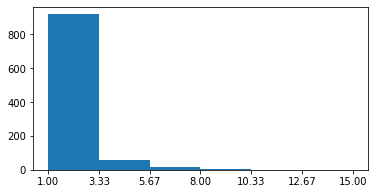

In [7]:
fig, ax = plt.subplots(figsize=(6,3))

counts, bins, patches = ax.hist(all_S100, bins=6)

ax.set_xticks(bins)
pass

In [8]:
print("Estimated Expectation E(S100): ", np.mean(all_S100))

Estimated Expectation E(S100):  1.81


Estimated Expectation E(S100):  1.764


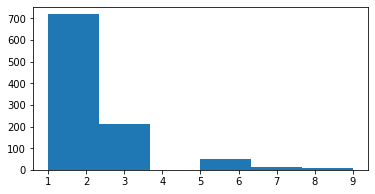

In [9]:
thous_traj_2 = simTrajectories(1, 200, .35, 1000)
all_S100_2 = []

for i in range(len(thous_traj_2)):
    all_S100_2.append(thous_traj_2[i][-1])

fig2, ax2 = plt.subplots(figsize=(6,3))

counts, bins, patches = ax2.hist(all_S100_2, bins=6)

ax.set_xticks(bins)
pass

print("Estimated Expectation E(S100): ", np.mean(all_S100_2))

In [10]:
#

In [11]:
# Based on my experiments, as well as the structure of
# process (Sn), I do not believe lim n->inf exists for
# P^n (1,k). For up-move probability p=0, the chain is
# periodic and bounces between states 0 and 1 with period
# 2. Periodic implies no limiting distribution. For up-
# move probability 0<p<1, the chain is also periodic because
# we can only return to a state after a minimum of 2 steps.
# For p=1, Sn does not have a limit because the Markov chain is 
# always increasing.